# 1.. read data from SQL Database !

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [243]:
conn = sqlite3.connect("password_data.sqlite")

In [244]:
data = pd.read_sql_query("select * from Users", conn)
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [245]:
data.shape

(100000, 3)

# 2.. Doing basic data cleaning !

### Removing ir-relevant features !

In [246]:
data.drop(["index"] , axis=1 , inplace=True)

### Check duplicate rows

In [247]:
data.duplicated().sum()

0

### check missing values in columns 

In [248]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [249]:
data.isnull().any()

password    False
strength    False
dtype: bool

### check data-types of every feature !

In [250]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has ir-relevant values or not !

In [251]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [252]:
data["strength"].value_counts()

strength
1    73883
0    13622
2    12495
Name: count, dtype: int64

In [253]:
import plotly
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot, download_plotlyjs

init_notebook_mode(connected=True)
cf.go_offline()

In [254]:
data["strength"].value_counts().iplot(kind="bar")
# data["strength"].iplot(kind="histogram")

# 3.. Performing Semantic Analysis !
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          
          

In [255]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

### a) How many password textual actually holds only numeric characters ?

In [256]:
data[data["password"].str.isnumeric()].shape

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [257]:
data[data["password"].str.isupper()].shape

(1506, 2)

### c) How many password textual actually holds only alphabet ? 

In [258]:
data[data["password"].str.isalpha()].shape

(50, 2)

### d) How many password textual actually holds alpha-numeric character ? 

In [259]:
data[data["password"].str.isalnum()].shape

(97203, 2)

### e) How many password textual actually holds title-case character ? 

In [260]:
data[data["password"].str.istitle()].shape

(932, 2)

### f) How many password textual actually holds special character ? 

In [261]:
import string
string.punctuation ## all punctuations defined in "string" package !

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [262]:
data["password"].apply(lambda x: any(char in string.punctuation for char in x)).sum()

2663

In [263]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [264]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [265]:
data[data["password"].apply(find_semantics)==1].shape

(2663, 2)

## 4.. Applying Feature Engineering !

#### length of every Password 

In [266]:
data["length"] = data["password"].str.len() 

#### Frequency of Lowercase Characters :

In [267]:
data["password"].apply(lambda x: sum(1 for i in x if i.islower())/len(x))

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [268]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

# data["password"].apply(freq_lowercase)

#### Frequency of Uppercase Characters :

In [269]:
data["password"].apply(lambda x: sum(1 for i in x if i.isupper())/len(x))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: password, Length: 100000, dtype: float64

In [270]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

# data["password"].apply(freq_uppercase)

#### Frequency of Numeric Characters :

In [271]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

data["password"].apply(freq_numerical_case)

0        0.666667
1        0.583333
2        0.222222
3        0.173913
4        0.375000
           ...   
99995    0.300000
99996    0.200000
99997    0.222222
99998    0.333333
99999    0.272727
Name: password, Length: 100000, dtype: float64

In [272]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)
data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)
data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

#### Frequency of Special-case Characters :

In [273]:
# def freq_special_case(row):
#     special_chars = []
#     for char in row:
#         if not char.isalpha() and not char.isdigit():
#             special_chars.append(char)
#     return len(special_chars)

# data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) 
# data["special_char_freq"] = data["special_char_freq"] / data["length"]

In [274]:
data["special_char_freq"] = np.round(data["password"].apply(lambda x: sum(1 for i in x if i in string.punctuation) / len(x)), 3)

In [275]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


## 5.. Performing Descriptive Statistics !

In [276]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [277]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
        'digit_freq', 'special_char_freq']

for col in cols:
    print(data[[col, 'strength']].groupby(
        ['strength']).agg(["min", "max", "mean", "median"]))
    print('*'*50)

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
**************************************************
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400
**************************************************
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429
**************************************************
         digit_freq                  

In [278]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

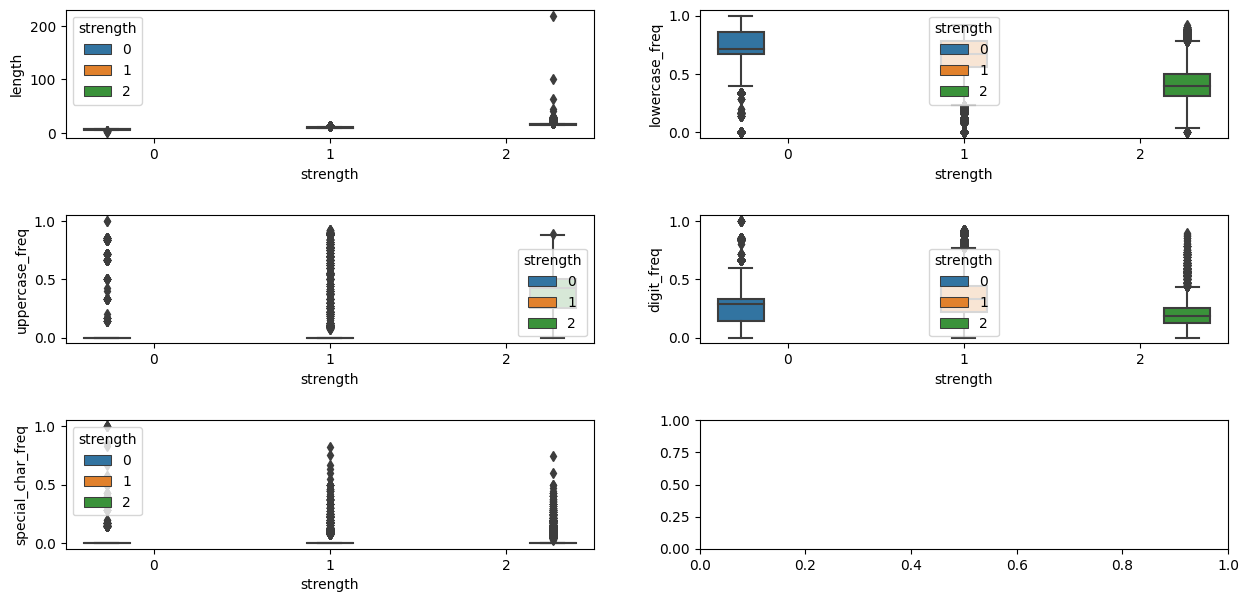

In [279]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 7))

sns.boxplot(x="strength", y='length', hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y='lowercase_freq',
            hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y='uppercase_freq',
            hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y='digit_freq', hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y='special_char_freq',
            hue="strength", ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

## 6.. Feature Importance ! ( How to figure out imp. feature )

In [280]:
def get_dist(data, feature):

    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    sns.violinplot(x='strength', y=feature, data=data)

    plt.subplot(1, 2, 2)
    sns.distplot(data[data['strength'] == 0][feature],
                 color="red", label="0", hist=False)
    sns.distplot(data[data['strength'] == 1][feature],
                 color="blue", label="1", hist=False)
    sns.distplot(data[data['strength'] == 2][feature],
                 color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [281]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

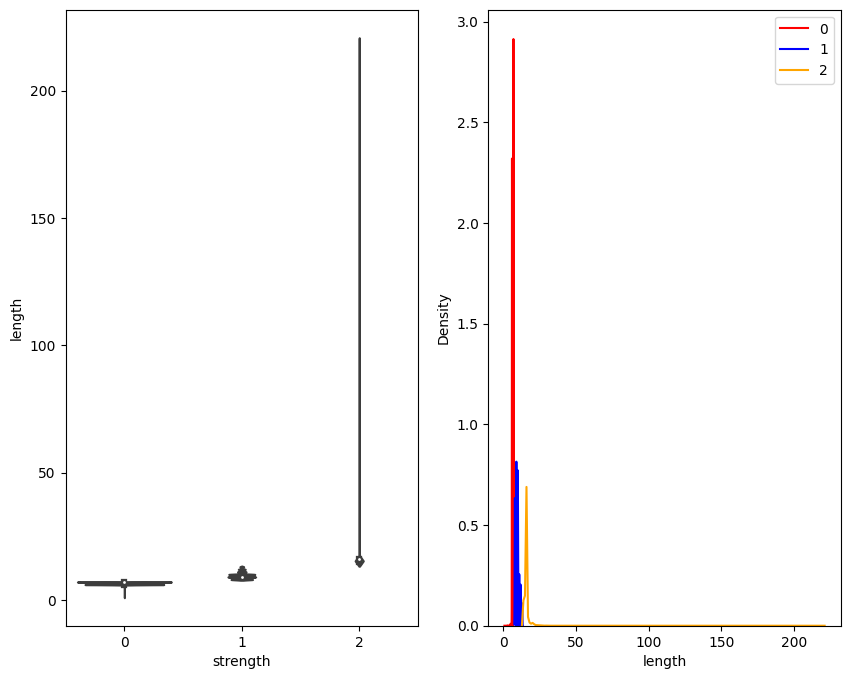

In [282]:
get_dist(data , "length")

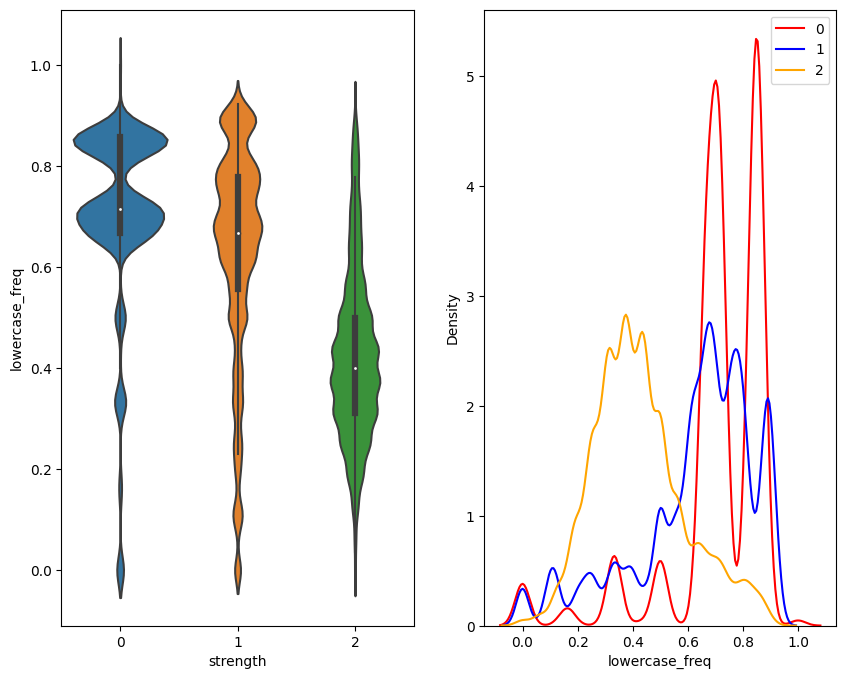

In [283]:
get_dist(data , 'lowercase_freq')

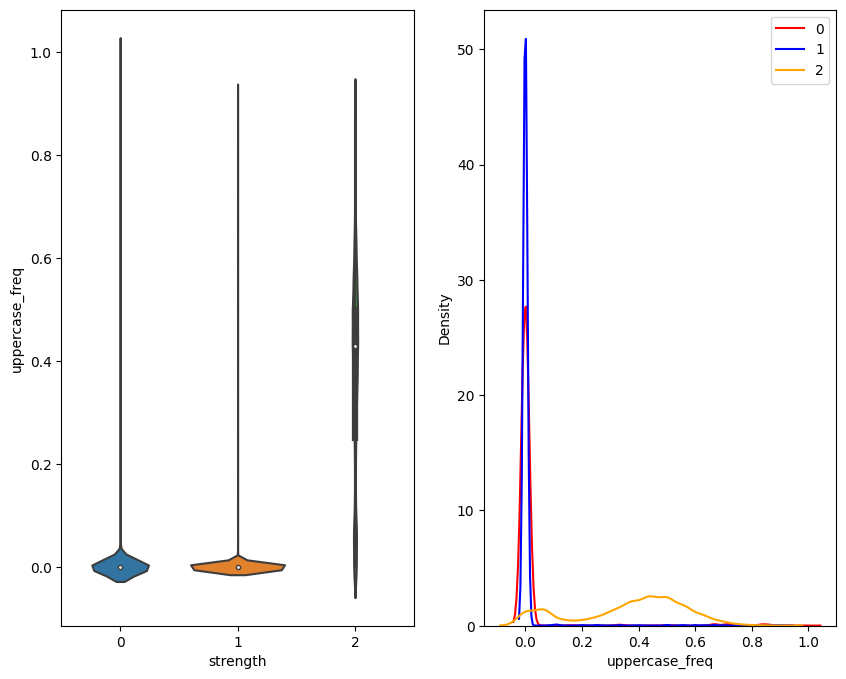

In [284]:
get_dist(data , 'uppercase_freq')

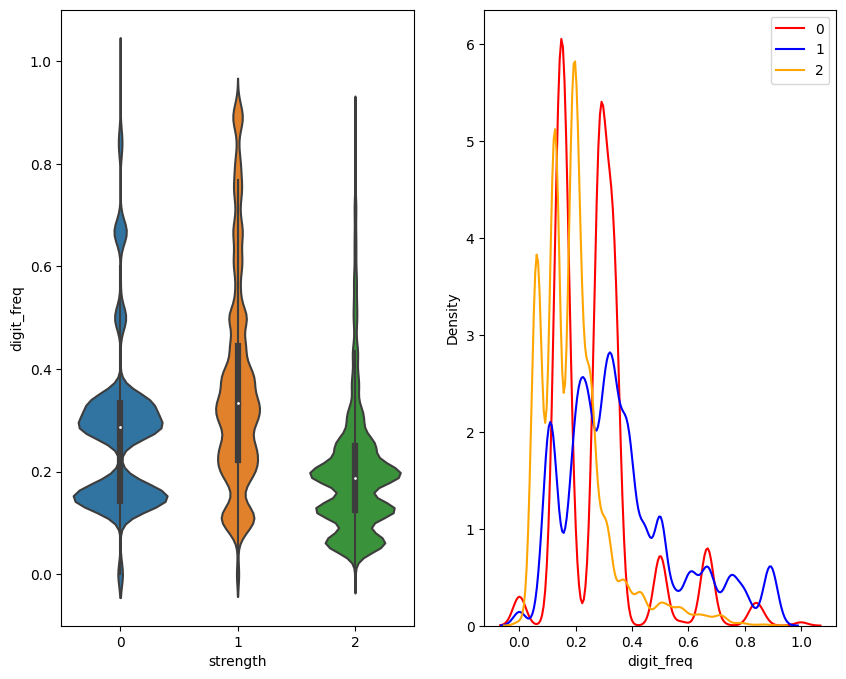

In [285]:
get_dist(data , 'digit_freq')

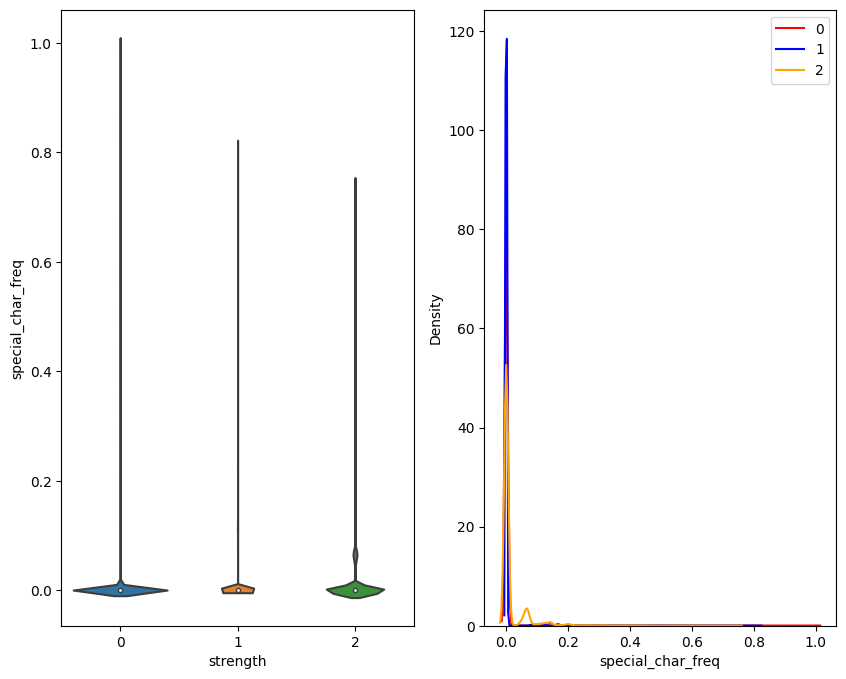

In [286]:
get_dist(data , 'special_char_freq')

## 7.. Applying TF_IDF on data

In [287]:
password_tuple = np.array(data)
password_tuple

array([['zxe870819', 1, 9, ..., 0.0, 0.667, 0.0],
       ['xw46454nr23l', 1, 12, ..., 0.0, 0.583, 0.0],
       ['soporte13', 1, 9, ..., 0.0, 0.222, 0.0],
       ...,
       ['czvrbun38', 1, 9, ..., 0.0, 0.222, 0.0],
       ['mymyxe430', 1, 9, ..., 0.0, 0.333, 0.0],
       ['glqjhkxb467', 1, 11, ..., 0.0, 0.273, 0.0]], dtype=object)

In [288]:
import random
random.shuffle(password_tuple)

In [289]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [290]:
def word_divide_char(inputs):
    character = []
    for i in inputs:
        character.append(i)
    return character

In [291]:
word_divide_char(x[0])

['z', 'x', 'e', '8', '7', '0', '8', '1', '9']

In [292]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel  
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
69599,k7afuub0,1,8,0.750,0.0,0.250,0.0
37734,0levilevi,1,9,0.889,0.0,0.111,0.0
68430,miangel19,1,9,0.778,0.0,0.222,0.0
59543,ahezare300,1,10,0.700,0.0,0.300,0.0
51680,kero3458,1,8,0.500,0.0,0.500,0.0
...,...,...,...,...,...,...,...
66353,hyzoru896,1,9,0.667,0.0,0.333,0.0
21180,kps4561561,1,10,0.300,0.0,0.700,0.0
72753,2262646cs,1,9,0.222,0.0,0.778,0.0
53327,kgm40anyvcg11,1,13,0.692,0.0,0.308,0.0


In [293]:
x = list(dataframe["password"])

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [295]:
tfidf = TfidfVectorizer(tokenizer=word_divide_char)
X = tfidf.fit_transform(x)

In [296]:
X.shape

(100000, 99)

In [297]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [298]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28767895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33344412, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21254398, 0.3563043 , 0.        ,
       0.        , 0.        , 0.3884668 , 0.        , 0.        ,
       0.        , 0.        , 0.32912254, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61212748, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [299]:
### returns feature/char_of_passwords/columns names

tfidf.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [300]:
first_document_vector = X[0]
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.28767895],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.33344412],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.21254398],
        [0.3563043 ],
        [0.        ],
        [0

In [301]:
df = pd.DataFrame(first_document_vector.T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df.sort_values(by=["TF-IDF"], ascending=False)

,TF-IDF
u,0.612127
f,0.388467
b,0.356304
7,0.333444
k,0.329123
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [302]:
df2 = pd.DataFrame(X.toarray() , columns=tfidf.get_feature_names_out())
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm !

In [303]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [304]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [305]:
y = dataframe["strength"]

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [315]:
from sklearn.linear_model import LogisticRegression

In [316]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

log_reg = LogisticRegression(multi_class="multinomial")

In [317]:
log_reg.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [318]:
y_pred = log_reg.predict(X_test) 

In [319]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [333]:
from collections import Counter
Counter(y_pred)

Counter({1: 16593, 0: 1460, 2: 1947})

In [331]:
sayi = dict()
my = y_pred.tolist()

for i in my:
    if i not in sayi:
        sayi[i] = 1
    else:
        sayi[i] += 1
sayi

{1: 16593, 0: 1460, 2: 1947}

## 9.. Doing prediction on sample data (user-entered input)

In [334]:
password = "%@123abcd"

In [335]:
sample_array = np.array([password])

In [336]:
sample_matrix = tfidf.transform(sample_array)

In [337]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [338]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [348]:
length_of_password = len(password)
total_lowercase_chars_freq = sum(1 for i in password if i.islower()) / len(password)

print("length_of_password : " , length_of_password)
print("total_lowercase_chars_freq : " , total_lowercase_chars_freq)

length_of_password :  9
total_lowercase_chars_freq :  0.4444444444444444


In [349]:
np.append(sample_matrix.toarray(), (length_of_password, total_lowercase_chars_freq))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [352]:
new_matrix = np.append(sample_matrix.toarray(), (length_of_password, total_lowercase_chars_freq)).reshape(1,101)
new_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [353]:
log_reg.predict(new_matrix)

array([0], dtype=int64)

In [356]:
def predict_password():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = tfidf.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = log_reg.predict(new_matrix2)
    
    if result == 0 :
        return f"{password} is weak password!"
    elif result == 1 :
        return f"{password} is normal password!"
    else:
        return f"{password} is strong password!"

In [357]:
predict_password()

'sifre123 is normal password!'

## 10.. Model evaluation :

In [358]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [359]:
accuracy_score(y_test , y_pred)

0.8053

In [360]:
confusion_matrix(y_test , y_pred)

array([[  768,  1904,     2],
       [  630, 13788,   395],
       [   62,   901,  1550]], dtype=int64)

In [361]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.37      2674
           1       0.83      0.93      0.88     14813
           2       0.80      0.62      0.70      2513

    accuracy                           0.81     20000
   macro avg       0.72      0.61      0.65     20000
weighted avg       0.79      0.81      0.79     20000

